In [1]:
# data processing
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
# linear algebra
import numpy as np 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [2]:
#IMPORTATION DES DONNEES titanic_train pour le training cleaner
titanic_train = pd.read_csv(r"/Users/ano/Desktop/projet_Titanic/titanic/titanic_train_cleaner.csv",encoding = "latin1")
#IMPORTATION DES DONNEES titanic_test cleaner
titanic_test = pd.read_csv(r"/Users/ano/Desktop/projet_Titanic/titanic/titanic_test_cleaner.csv",encoding = "latin1")
print(titanic_test)

     Unnamed: 0  PassengerId  Pclass  \
0             0          892       3   
1             1          893       3   
2             2          894       2   
3             3          895       3   
4             4          896       3   
..          ...          ...     ...   
413         413         1305       3   
414         414         1306       1   
415         415         1307       3   
416         416         1308       3   
417         417         1309       3   

                                             Name     Sex  Age  SibSp  Parch  \
0                                Kelly, Mr. James    male   22      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female   38      1      0   
2                       Myles, Mr. Thomas Francis    male   26      0      0   
3                                Wirz, Mr. Albert    male   35      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   35      1      1   
..                                     

In [3]:
titanic_train.describe()

,Unnamed: 0,Survived,Pclass,Age,SibSp,Parch,Fare,relatives,not_alone
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.154882,0.523008,0.381594,32.204208,0.904602,0.602694
std,257.353842,0.486592,0.836071,13.540394,1.102743,0.806057,49.693429,1.613459,0.489615
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.000000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,667.500000,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000,1.000000,1.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000,1.000000


In [4]:
titanic_test.describe()

,Unnamed: 0,PassengerId,Pclass,Age,SibSp,Parch,Fare,relatives,not_alone
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000,418.000000,418.000000
mean,208.500000,1100.500000,2.265550,28.308612,0.447368,0.392344,35.627188,0.839713,0.605263
std,120.810458,120.810458,0.841838,13.199556,0.896760,0.981429,55.907576,1.519072,0.489380
min,0.000000,892.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,104.250000,996.250000,1.000000,20.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,208.500000,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,312.750000,1204.750000,3.000000,36.000000,1.000000,0.000000,31.500000,1.000000,1.000000
max,417.000000,1309.000000,3.000000,71.000000,8.000000,9.000000,512.329200,10.000000,1.000000


In [5]:
titanic_train.head(5)


,Unnamed: 0,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone
0,0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,1,0
1,1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,1,0
2,2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,0,1
3,3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,1,0
4,4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,0,1


In [6]:
titanic_test.head(5)

,Unnamed: 0,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone
0,0,892,3,"Kelly, Mr. James",male,22,0,0,330911,7.8292,Q,0,1
1,1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,38,1,0,363272,7.0000,S,1,0
2,2,894,2,"Myles, Mr. Thomas Francis",male,26,0,0,240276,9.6875,Q,0,1
3,3,895,3,"Wirz, Mr. Albert",male,35,0,0,315154,8.6625,S,0,1
4,4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,35,1,1,3101298,12.2875,S,2,0


In [7]:
#nombre de ligne et de colonne
titanic_train.shape

(891, 13)

In [8]:
#nombre de ligne et de colonne
titanic_test.shape

(418, 13)

In [9]:
#recupération de maximun de détaille( examiner les valeure manquande)
total = titanic_train.isnull().sum().sort_values(ascending=False)
percent_1 = titanic_train.isnull().sum()/titanic_train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
not_alone,0,0.0
relatives,0,0.0
Embarked,0,0.0
Fare,0,0.0
Ticket,0,0.0


In [10]:
#recupération de maximun de détaille( examiner les valeure manquande)
total = titanic_test.isnull().sum().sort_values(ascending=False)
percent_1 = titanic_test.isnull().sum()/titanic_test.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Fare,1,0.2
not_alone,0,0.0
relatives,0,0.0
Embarked,0,0.0
Ticket,0,0.0


In [12]:
#on observe qu'il reste toujour un NAN dans Fare je fais le choix de la remplacer par la moyenne des fare
fare = titanic_test['Fare'].mean()
titanic_test['Fare'].fillna(fare, inplace=True)
#je reverifie bien si mon dossier n' a plus de Nan et qui celle ci est belle et bien clean
print(titanic_test.isna().sum())

Unnamed: 0     0
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
relatives      0
not_alone      0
dtype: int64


In [13]:
#exporter le fichier training en CVS dans mon dossier pour analuse avec visuelle sur power BI
titanic_train.to_csv('/Users/ano/Desktop/projet_Titanic/titanic/titanic_train_cleaner2.csv', sep = ',',index = True)

In [14]:
#exporter le fichier training en CVS dans mon dossier pour analuse avec visuelle sur power BI
titanic_test.to_csv('/Users/ano/Desktop/projet_Titanic/titanic/titanic_test_cleaner2.csv', sep = ',',index = True)

In [15]:
titanic_train.columns.values

array(['Unnamed: 0', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'relatives', 'not_alone'],
      dtype=object)

In [16]:
titanic_test.columns.values

array(['Unnamed: 0', 'PassengerId', 'Pclass', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked', 'relatives',
       'not_alone'], dtype=object)

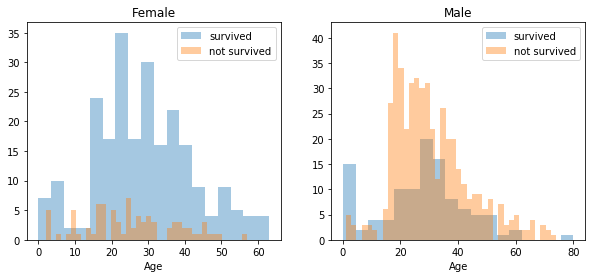

In [17]:
#il serait logique que tout sauf «PassengerId», «Ticket» et «Name» soit en corrélation avec un taux de survie élevé.
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = titanic_train[titanic_train['Sex']=='female']
men = titanic_train[titanic_train['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

/Users/ano/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


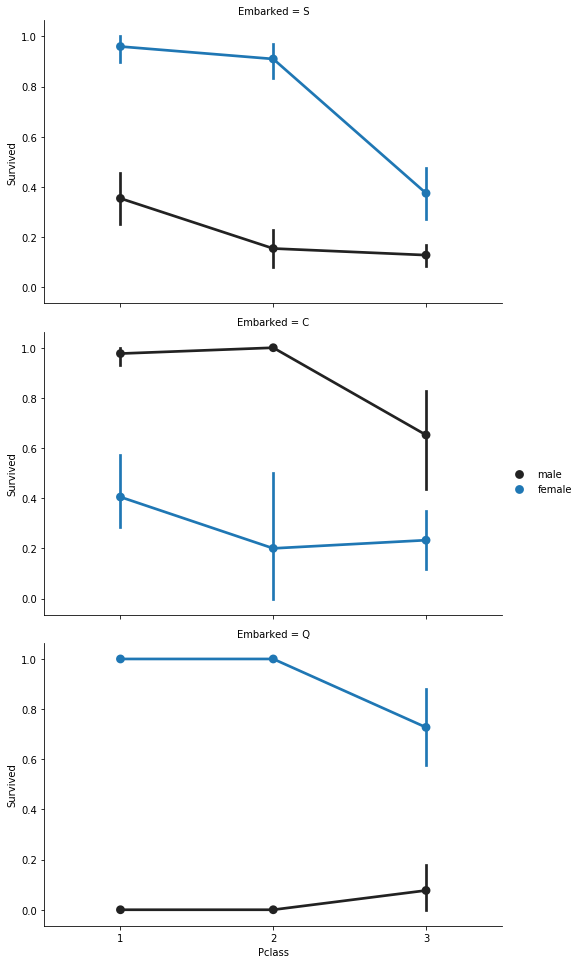

In [18]:
#Embarked, Pclass et Sex
FacetGrid = sns.FacetGrid(titanic_train, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

In [19]:
#Embarqué semble être en corrélation avec la survie, selon le sexe.
#Les femmes au port Q et au port S ont plus de chances de survivre. 
#L'inverse est vrai, s'ils sont au port C. Les hommes ont une forte probabilité de survie s'ils sont au port C, 
#mais une faible probabilité s'ils sont au port Q ou S.

In [20]:
#nombre de ligne et de colonne
titanic_train.shape

(891, 13)

In [21]:
#nombre de ligne et de colonne
titanic_test.shape

(418, 13)

In [22]:
#recupération de maximun de détaille( examiner les valeure manquande)
total = titanic_train.isnull().sum().sort_values(ascending=False)
percent_1 = titanic_train.isnull().sum()/titanic_train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
not_alone,0,0.0
relatives,0,0.0
Embarked,0,0.0
Fare,0,0.0
Ticket,0,0.0


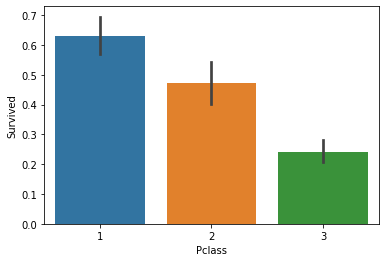

In [23]:
sns.barplot(x='Pclass', y='Survived', data=titanic_train)

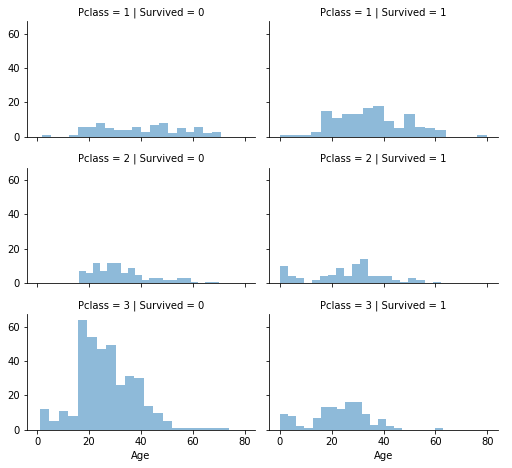

In [24]:
grid = sns.FacetGrid(titanic_train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [25]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Unnamed: 0    891 non-null int64
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null object
Age           891 non-null int64
SibSp         891 non-null int64
Parch         891 non-null int64
Ticket        891 non-null object
Fare          891 non-null float64
Embarked      891 non-null object
relatives     891 non-null int64
not_alone     891 non-null int64
dtypes: float64(1), int64(8), object(4)
memory usage: 90.6+ KB


In [26]:
#on transforme le prix ou FARE qui est float en INT
data = [titanic_train, titanic_test]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [27]:
data = [titanic_train, titanic_test]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)

In [29]:
#convertise le sex en numeric male:0 femal:1
genders = {"male": 0, "female": 1}
data = [titanic_train, titanic_test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)


In [30]:
# pour la variable ticket on va juste les suprimer car il manque beaucoup trop de donné en NAN 
#qui font plus de la moitier des données
titanic_train = titanic_train.drop(['Ticket'], axis=1)
titanic_test = titanic_test.drop(['Ticket'], axis=1)

In [31]:
#convertire la variable Embarked en mumeric ( S=0 , C=1 , Q=2)
ports = {"S": 0, "C": 1, "Q": 2}
data = [titanic_train, titanic_test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [32]:
#on créé les catégorie d'ages(1,2,3,4,5,6)
data = [titanic_train, titanic_test]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6
#titanic_train['Age'].describe()

In [36]:
#titanic_train= titanic_train.drop(['Name'], axis=1)
titanic_test= titanic_test.drop(['Name'], axis=1)

titanic_train.head(10)

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Title
0,0,0,3,0,2,1,0,7,0,1,0,1
1,1,1,1,1,5,1,0,71,1,1,0,3
2,2,1,3,1,3,0,0,7,0,0,1,2
3,3,1,1,1,5,1,0,53,0,1,0,3
4,4,0,3,0,5,0,0,8,0,0,1,1
5,5,0,3,0,1,0,0,8,2,0,1,1
6,6,0,1,0,6,0,0,51,0,0,1,1
7,7,0,3,0,0,3,1,21,0,4,0,4
8,8,1,3,1,3,0,2,11,0,2,0,3
9,9,1,2,1,1,1,0,30,1,1,0,3


In [37]:
titanic_test.head(10)

,Unnamed: 0,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Title
0,0,892,3,0,2,0,0,7,2,0,1,1
1,1,893,3,1,5,1,0,7,0,1,0,3
2,2,894,2,0,3,0,0,9,2,0,1,1
3,3,895,3,0,5,0,0,8,0,0,1,1
4,4,896,3,1,5,1,1,12,0,2,0,3
5,5,897,3,0,1,0,0,9,0,0,1,1
6,6,898,3,1,6,0,0,7,2,0,1,2
7,7,899,2,0,0,1,1,29,0,2,0,1
8,8,900,3,1,3,0,0,7,1,0,1,3
9,9,901,3,0,1,2,0,24,0,2,0,1


In [38]:
#Pour la fonction «Tarif», nous devons faire de même que pour la fonction «Âge».
#Mais ce n'est pas si simple, car si nous réduisions la fourchette des valeurs tarifaires en quelques catégories également importantes, 
#80% des valeurs tomberaient dans la première catégorie. Heureusement, nous pouvons utiliser la fonction sklearn «qcut ()», que nous pouvons utiliser pour voir, comment nous pouvons former les catégories.
data = [titanic_train, titanic_test]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [39]:
titanic_test.head(10)

,Unnamed: 0,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Title
0,0,892,3,0,2,0,0,0,2,0,1,1
1,1,893,3,1,5,1,0,0,0,1,0,3
2,2,894,2,0,3,0,0,1,2,0,1,1
3,3,895,3,0,5,0,0,1,0,0,1,1
4,4,896,3,1,5,1,1,1,0,2,0,3
5,5,897,3,0,1,0,0,1,0,0,1,1
6,6,898,3,1,6,0,0,0,2,0,1,2
7,7,899,2,0,0,1,1,2,0,2,0,1
8,8,900,3,1,3,0,0,0,1,0,1,3
9,9,901,3,0,1,2,0,2,0,2,0,1


In [40]:
titanic_train.head(10)

,Unnamed: 0,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Title
0,0,0,3,0,2,1,0,0,0,1,0,1
1,1,1,1,1,5,1,0,3,1,1,0,3
2,2,1,3,1,3,0,0,0,0,0,1,2
3,3,1,1,1,5,1,0,3,0,1,0,3
4,4,0,3,0,5,0,0,1,0,0,1,1
5,5,0,3,0,1,0,0,1,2,0,1,1
6,6,0,1,0,6,0,0,3,0,0,1,1
7,7,0,3,0,0,3,1,2,0,4,0,4
8,8,1,3,1,3,0,2,1,0,2,0,3
9,9,1,2,1,1,1,0,2,1,1,0,3


In [41]:
#colone age par classe 
data = [titanic_train, titanic_test]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

In [43]:
#colonne prix par personne FARE
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

Unnamed: 0         0
Survived           0
Pclass             0
Sex                0
Age                0
SibSp              0
Parch              0
Fare               0
Embarked           0
relatives          0
not_alone          0
Title              0
Age_Class          0
Fare_Per_Person    0
dtype: int64


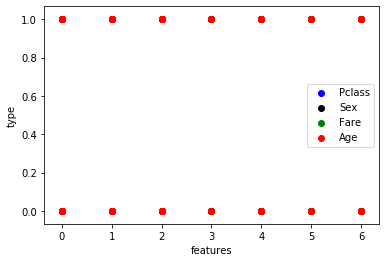

In [44]:
#je reverifie bien si mon dossier n'a plus de Nan et qui celle ci est belle et bien cleaner
print(titanic_train.isna().sum())


plt.xlabel('features')
plt.ylabel('type')
pltX=titanic_train.loc[:,'Survived']
pltY=titanic_train.loc[:,'Pclass']
plt.scatter(pltY,pltX, color ='blue', label='Pclass')

pltX=titanic_train.loc[:,'Survived']
pltY=titanic_train.loc[:,'Sex']
plt.scatter(pltY,pltX, color ='black', label='Sex')

pltX=titanic_train.loc[:,'Survived']
pltY=titanic_train.loc[:,'Fare']
plt.scatter(pltY,pltX, color ='green', label='Fare')

pltX=titanic_train.loc[:,'Survived']
pltY=titanic_train.loc[:,'Age']
plt.scatter(pltY,pltX, color ='red', label='Age')

plt.legend()
plt.show()

In [85]:
X_train = titanic_train.drop("Survived", axis=1)
Y_train = titanic_train["Survived"]
X_test  = titanic_test.drop("PassengerId", axis=1).copy()
Y_test = titanic_train["Survived"]
#IMPORTATION DES DONNEES titanic_train pour le training de l'(algo)
titanic_survi = pd.read_csv(r"/Users/ano/Desktop/projet_Titanic/titanic/gender_submission.csv",encoding = "latin1")

In [86]:
print(titanic_survi.shape)

(418, 2)


In [87]:
Y_test=titanic_survi["Survived"]

In [88]:
#regression linear
# Construction du modèle entrainement et observé c'est valeur pour entrainer le teste ou pas 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)
import numpy as np
print(model.intercept_)
print(model.coef_)

#calcul du R²
print("R² :", model.score(X_train,Y_train))

RMSE=np.sqrt(((Y_train-model.predict(X_train))**2).sum()/len(Y_train))
print("RMSE :", RMSE)

0.4978118397775206
[ 1.10592940e-05 -1.36082866e-01  4.28519775e-01 -3.29331716e-02
 -2.86926134e-02 -1.81753788e-02  6.01972696e-02  3.37098223e-02
 -4.68679922e-02 -2.66325959e-02  7.99384822e-02  3.78774354e-03
 -4.12159210e-02]
R² : 0.41249813214407804
RMSE : 0.3727572911853315


In [116]:
#Stochastic Gradient Descent (SGD)
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_test, Y_test)


acc_sgd = round(sgd.score(X_test, Y_test) * 100, 2)



In [117]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_test, Y_test)
acc_random_forest = round(random_forest.score(X_test, Y_prediction) * 100, 2)

In [127]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix
#affichage plus de la matrice de confusion
cm = pd.DataFrame(confusion_matrix(Y_test, Y_prediction), columns=['prédit ' + str(_) for _ in random_forest.classes_])
cm.index = ['vrai ' + str(_) for _ in random_forest.classes_]
cm


,prédit 0,prédit 1
vrai 0,236,30
vrai 1,29,123


In [128]:
#regression logistique
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_test, Y_test) * 100, 2)

/Users/ano/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [129]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix
#affichage plus de la matrice de confusion
cm = pd.DataFrame(confusion_matrix(Y_test, Y_pred), columns=['prédit ' + str(_) for _ in logreg.classes_])
cm.index = ['vrai ' + str(_) for _ in logreg.classes_]
cm



,prédit 0,prédit 1
vrai 0,247,19
vrai 1,19,133


In [130]:
#KNN 
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_test, Y_test) * 100, 2)

In [131]:
results = pd.DataFrame({
    'Model': [ 'Logistic Regression', 
              'Random Forest'],
    'Score': [ acc_log, acc_random_forest]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
100.00,Random Forest
90.91,Logistic Regression


In [138]:
importances = pd.DataFrame({'feature':X_test.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Unnamed: 0,0.260
Title,0.169
Sex,0.135
Age_Class,0.075
Pclass,0.069
Age,0.060
Fare,0.060
relatives,0.044
Embarked,0.037


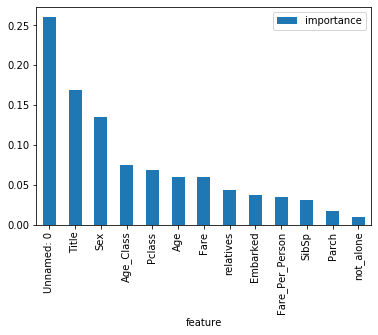

In [139]:
importances.plot.bar()

In [140]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_test, Y_test, cv=3)
confusion_matrix(Y_test, predictions)


array([[266,   0],
       [  0, 152]])

In [141]:
print(Y_test)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [142]:
predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [149]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_test, predictions))
print("Recall:",recall_score(Y_test, predictions))

Precision: 1.0
Recall: 1.0


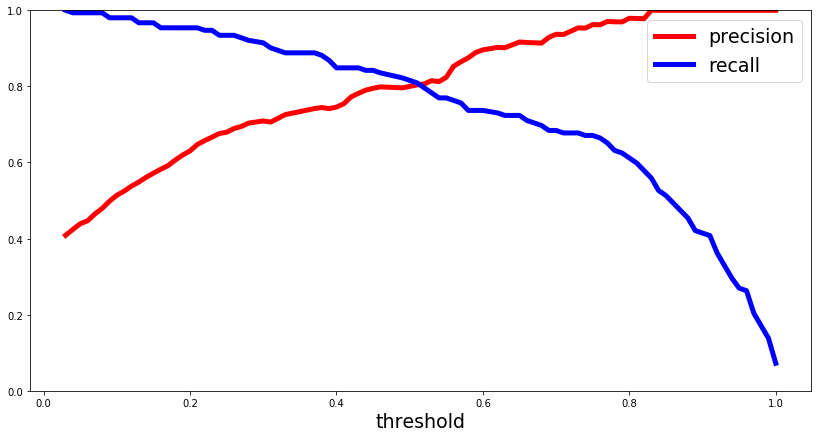

In [144]:

from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_test)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_test, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

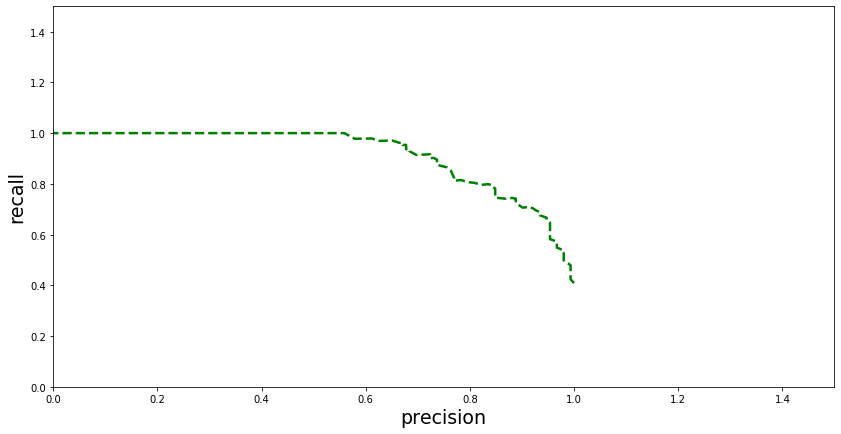

In [145]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

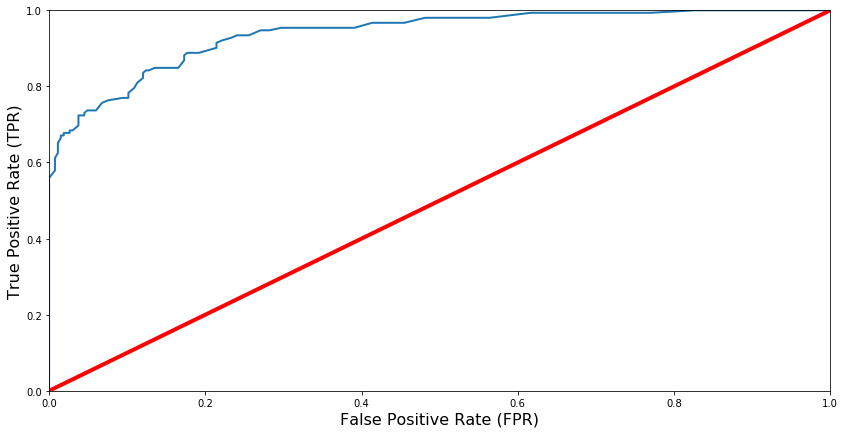

In [146]:
#ROC AUC Curve
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [148]:
#ROC AUC Score
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_test, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9388108428967156


In [150]:
###TESTE A MOI### RECHERCHE SUR UNE SEULE PASSAGER AVEC REGRESSION LOGISTIQUE ET POUR 4 VARIABLE ###

In [170]:
# X_train 4 variable a garder age,sex,prix,class
#del X_train['Embarked']
#del X_train['relatives']
#del X_train['Title']
#del X_train['Age_Class']
#del X_train['SibSp']
#del X_train['not_alone']
#del X_train['Parch']
#del X_train['Fare_Per_Person']
#del X_train['Unnamed: 0']

In [171]:
X_train.head(5)

,Pclass,Sex,Age,Fare
0,3,0,2,0
1,1,1,5,3
2,3,1,3,0
3,1,1,5,3
4,3,0,5,1


In [169]:
X_test.head(5)

,Pclass,Sex,Age,Fare
0,3,0,2,0
1,3,1,5,0
2,2,0,3,1
3,3,0,5,1
4,3,1,5,1


In [161]:
# on ne garde que 4 variable  Age sexe prix pclass
#del X_test['Embarked']
#del X_test['relatives']
#del X_test['Title']
#del X_test['Age_Class']
#del X_test['SibSp']
#del X_test['not_alone']
#del X_test['Parch']
#del X_test['Fare_Per_Person']
#del X_test['Unnamed: 0']

In [162]:
X_test.head(5)

,Pclass,Sex,Age,Fare
0,3,0,2,0
1,3,1,5,0
2,2,0,3,1
3,3,0,5,1
4,3,1,5,1


In [172]:
from sklearn.linear_model import LogisticRegression
reg_log = LogisticRegression(solver='lbfgs', multi_class='auto', random_state = 0)
reg_log.fit(X_train, Y_train)

# Prédictions des probabilités
prob_pred = reg_log.predict_proba(X_test)

# Prédictions des résultats du Test train set
Y_pred = reg_log.predict(X_test)

# Matrice de confusion
from sklearn.metrics import confusion_matrix
#affichage plus de la matrice de confusion
cm = pd.DataFrame(confusion_matrix(Y_test, Y_pred), columns=['prédit ' + str(_) for _ in reg_log.classes_])
cm.index = ['vrai ' + str(_) for _ in reg_log.classes_]
cm

,prédit 0,prédit 1
vrai 0,247,19
vrai 1,8,144


In [173]:
print(reg_log.intercept_)
print(reg_log.coef_)

#calcul du R²
print("R² :", reg_log.score(X_train,Y_train))

[1.46088401]
[[-1.06250321  2.52876374 -0.15441601 -0.00540529]]
R² : 0.7845117845117845


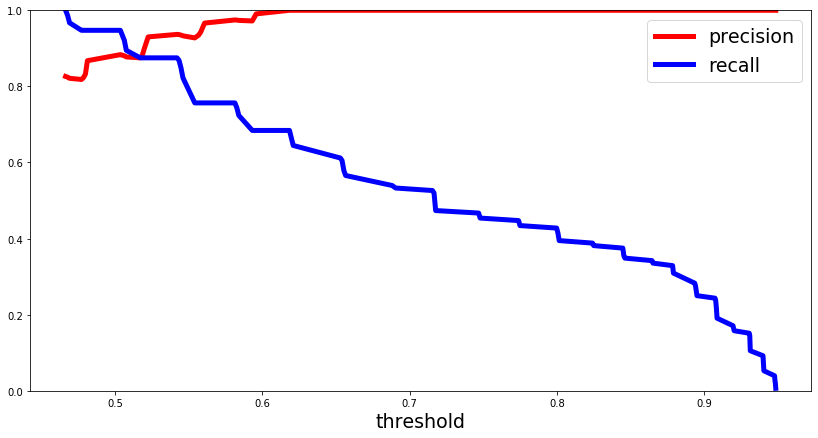

In [174]:
from sklearn.metrics import precision_recall_curve
#Nous allons tracer la précision et rappeler avec le seui
# getting the probabilities of our predictions
y_scores = reg_log.predict_proba(X_test)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_test, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

In [175]:
# ON essaie de predire si le passager clement a survecu ou est mort ####

In [178]:
classe_lucien=3

sexe_lucien=0 # sexe vaut 1 pour les femmes et 0 pour les hommes

age_lucien=2

prix_billet_lucien=15



## On insère tout dans un seul et même objet appelé "lucien"

lucien=np.array([classe_lucien,sexe_lucien,age_lucien,prix_billet_lucien]).reshape(1, -1)

## Puis on demande la prédiction de survie

print(reg_log.predict(lucien))


[0]


In [179]:
print(reg_log.predict_proba(lucien)[0][0])

0.8925001213651528


In [180]:
#ON VOIT QUE LE RESULTAT DE CELUI_CI EST 0 DONC IL EST PREDIT QU'IL MEURT avec un pourcentage de: 87%

In [ ]:
#SOMMAIRE
#Nous avons commencé par l'exploration des données où nous avons eu une idée de l'ensemble de données,
#vérifié les données manquantes et appris quelles fonctionnalités sont importantes. 
#Au cours de ce processus, nous avons utilisé seaborn et matplotlib pour effectuer les visualisations.
#Au cours de la partie de prétraitement des données, nous avons calculé les valeurs manquantes, 
#converti les entités en valeurs numériques, regroupé les valeurs en catégories et créé quelques nouvelles entités.
#Ensuite, nous avons commencé à former 4 modèles d'apprentissage automatique différents, 
#en avons choisi un (forêt aléatoire) et y avons appliqué une validation croisée. 
#Ensuite, nous avons discuté du fonctionnement de la forêt aléatoire, 
#examiné l'importance qu'elle attribue aux différentes fonctionnalités et optimisé ses performances en optimisant ses valeurs hyperparamétriques. 
#Enfin, nous avons examiné sa matrice de confusion et calculé la précision, le rappel et le f-score du modèle.


####TESTE A 4 VARIABLE PREDICTION D'UN PASSAGER ####
#derniere faire recréé un test de model regression logistiqque qui pour moi me semblais beaucoup plus fiable pour ce cas que la regression linear .
#cette fois ci on a utiliser que 4 variable qui sont lié entre elle avec le model deja entrainé on a pue effectuer la recherche d'un des passagers 
#exemple: clement, on a recupré sa classe, le pris de billet ,le tranche age, sont sex. 
#le model nous prédit 0 . 
#donc qu'il ne survivait pas a l'accident.